# Classifying banknotes as fraud or not using support vector machines

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

in other words,the work of svm is to divide your dataset into seperate regions and each section acts as a class for prediction.SVM is a very strong ML algorithm that helps in classifying data very efficiently.

in this example we are going to use sklearn's  svm module to train our dataset.
first we shall import all the necessary libraries such as:
numpy
pandas
matplotlib

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC



the dataset is provided by UCI machine learning repository.
**to upload the dataset first download it into your system and select the dataset from the box below.**
the dataset shall be provided in the repository as(Saving data_banknote_authentication - Copy.txt)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving data_banknote_authentication - Copy.txt to data_banknote_authentication - Copy.txt


the type of data uploaded is in "dict" type so we have to convert into a form readable by pandas

In [4]:
from io import StringIO

s=str(uploaded['data_banknote_authentication - Copy.txt'],'utf-8')

data = StringIO(s) 

dataset=pd.read_csv(data,names=['variance','skewness','curtosis','entropy','class'])
dataset.head()


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


attributes of dataset:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 

splitting data to labels and parameters

In [5]:
x=dataset.drop('class',axis=1)
y=dataset['class']
print("shapes of our datasets are x:{} && y:{}".format(x.shape,y.shape))

shapes of our datasets are x:(1372, 4) && y:(1372,)


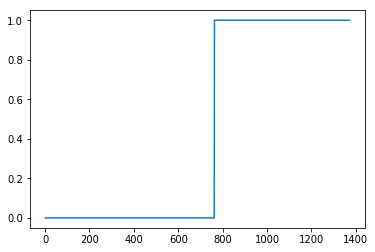

In [6]:
plt.plot(np.linspace(1,1372,1372,dtype=int),y)

our label data seems sorted

splitting data into training and testing data

In [0]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)  

the hyperparameters of svm gamma and c define how our hyperplane behaves:
*  The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

* C controls the cost of misclassification:
                                *Small C makes the cost of misclassificaiton low ("soft margin"), thus allowing more of them for the sake of wider "cushion".
                                *Large C makes the cost of misclassification high ('hard margin"), thus forcing the algorithm to explain the input data stricter and potentially overfit.

The goal is to find the balance between "not too strict" and "not too loose". Cross-validation and resampling, along with grid search, are good ways to finding the best C.


# training

In [8]:
svm_classifier=SVC(C=1,kernel='rbf')
svm_classifier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

# testing

In [0]:
y_pred=svm_classifier.predict(X_test)

100.0 % accuracy
[[157   0]
 [  0 118]]


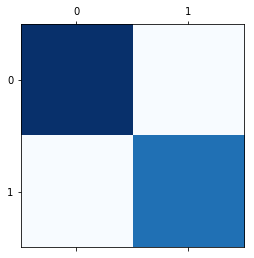

In [10]:
print(svm_classifier.score(X_test,y_test)*100,"% accuracy")
from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(y_pred,y_test),cmap='Blues')
print(confusion_matrix(y_pred,y_test))

our model has 100% accuracy

**variation of efficiency vs value of C**

In [0]:
cvals=np.linspace(0.001,1,1000)
#print(cvals)
predicted_range=np.array([])
for i,c in enumerate(cvals):
    #print(c)
    svm_classifier=SVC(C=0+c,kernel='rbf',gamma=0.5)
    svm_classifier.fit(X_train,y_train)
    predicted_range=np.append(predicted_range,svm_classifier.score(X_test,y_test)*100)
    


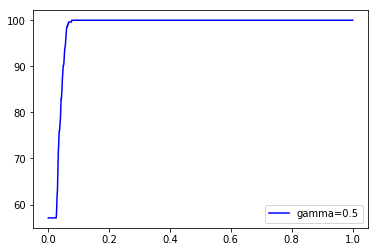

In [12]:

plt.plot(cvals,predicted_range,color='b',label='gamma=0.5')
plt.legend()
plt.show()
